# Business Sales Analysis
This project is an analysis of the sales made by an Electronics Company in 2019.  It tries to gain insights about the data and provides answers to valuable business questions to help make better decisions and increase profits and skyrocket growth.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

In [5]:
pd.reset_option('display.max_rows', 180)

In [6]:
pd.read_csv("./Sales_Data/Sales_April_2019.csv")

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
18378,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


## Merging the 12 Months Sales

In [7]:
sales_data_source = [file for file in os.listdir('./Sales_Data/')]

all_months_sales = pd.DataFrame()

for file in sales_data_source:
    df = pd.read_csv('./Sales_Data/'+file)
    all_months_sales = pd.concat([all_months_sales, df])
  
all_months_sales.to_csv('all_months_sales.csv', index=False)
    

## Importing All_Months_Sales Record

In [8]:
all_months_sales = pd.read_csv('./all_months_sales.csv')
all_months_sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [ ]:
nan_df =all_months_sales[all_months_sales.isna().any(axis=1)]
nan_df.shape

In [ ]:
nan_df.head(62)

## Cleaning up Data

In [ ]:
all_months_sales = all_months_sales.dropna(how='all')
all_months_sales

### Finding and Deleting 'Or'

In [ ]:
all_months_sales = all_months_sales[all_months_sales['Order Date'].str[0:2] != 'Or']

In [ ]:
all_months_sales['Quantity Ordered'] = pd.to_numeric(all_months_sales['Quantity Ordered'])
all_months_sales['Price Each'] = pd.to_numeric(all_months_sales['Price Each'])
all_months_sales.head()

## Augmenting Data with additional columns

### Adding 'Month' column

In [ ]:
all_months_sales['Month'] = all_months_sales['Order Date'].str[0:2]
all_months_sales['Month'] = all_months_sales['Month'].astype(int)

In [ ]:
all_months_sales.head()

### Adding an  'Amount' column

In [ ]:
all_months_sales['Amount'] = all_months_sales['Quantity Ordered'] * all_months_sales['Price Each']

In [ ]:
all_months_sales.head()

### Adding a 'City' column

In [ ]:
def get_city(city_name):
    return city_name.split(',')[-2]

def get_state(state_name):
    return state_name.split(',')[2].split(' ')[1]

all_months_sales['City'] = all_months_sales['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

In [ ]:
all_months_sales.head()

## Adding an 'Order Hour & Min.' columns

In [ ]:
all_months_sales['Order Date'] = pd.to_datetime(all_months_sales['Order Date'])
all_months_sales['Order Hour'] = all_months_sales['Order Date'].dt.hour
all_months_sales['Order Min.'] = all_months_sales['Order Date'].dt.minute

In [ ]:
all_months_sales

## What is the best month for sales? How much was earned?

In [ ]:
best_sales = all_months_sales.groupby('Month').sum()
best_sales

In [ ]:
months = range(1, 13)
plt.bar(months, best_sales['Amount'])
plt.xticks(months)
plt.xlabel('Months in year 2019')
plt.ylabel('Amount in USD ($)')
plt.show()

In [ ]:
# My Answer: The best sales was on December and earnings = $4,613,443.34

## What city made the highest purchase?

In [ ]:
best_city = all_months_sales.groupby('City').sum()
best_city

In [ ]:
cities = [city for city, data in all_months_sales.groupby('City')]
plt.bar(cities, best_city['Amount'])
plt.xticks(cities, rotation='vertical', size=10)
plt.show()



In [ ]:
# My Answer : The highest purchase was made in San Francisco with a total of 50239 orders

## What time should we display advertisements to maximize likelihood of customer's buying product?

In [ ]:
best_hour = [hour for hour, data in all_months_sales.groupby('Order Hour')]

plt.plot(best_hour, all_months_sales.groupby(['Order Hour']).count())
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.xticks(best_hour)
plt.grid()


In [ ]:
# My recommendation is 11am and 7pm (19:00)

## What products are most often sold together?

In [ ]:
no_duplicate = all_months_sales[all_months_sales['Order ID'].duplicated(keep=False)]
no_duplicate['Grouped'] = no_duplicate.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
no_duplicate = no_duplicate[['Order ID', 'Grouped']].drop_duplicates()
no_duplicate

In [ ]:
from itertools import combinations
from collections import Counter

count  = Counter()

for row in no_duplicate['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
   
for key, value in count.most_common(10):
    print(key, value)

In [ ]:
# The highest product sold together is iPhone with Lightning Charging Cable

## What product sold the most? Why do you think so?

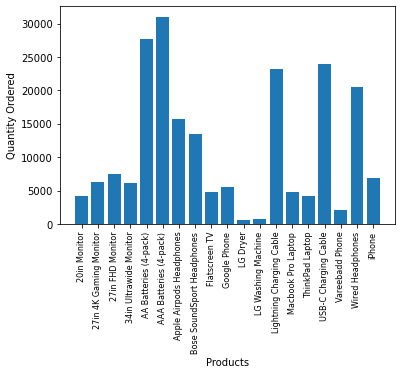

In [91]:
product_list = all_months_sales.groupby('Product')
quantity_ordered = product_list.sum()['Quantity Ordered']

products = [product for product, df in product_list]
plt.bar(products, quantity_ordered)
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.xticks(products, rotation='vertical', size=8)
plt.show()

In [92]:
# AAA Batteries (4-pack) sold the best

TypeError: only size-1 arrays can be converted to Python scalars

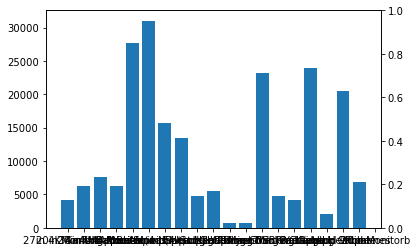

In [96]:
prices  = all_months_sales.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(products, quantity_ordered)
ax2.bar(products, prices, 'b-')
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')

ax2.set_ylabel('Prices', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()